In [1]:
using BSON
using PrettyTables
using Statistics
using DataFrames
using Plots
using KernelDensity
using Distributions

# Uniform Distribution versus Log Normal Distribution]

In [2]:
path= "/Users/amir/github/ceo/ceo-estimation/estimator/res1/est_300_sim_50_dmode_3.bson"

"/Users/amir/github/ceo/ceo-estimation/estimator/res1/est_300_sim_50_dmode_3.bson"

In [3]:
res = BSON.load(path)

Dict{Any, Any} with 1 entry:
  "beta_hat" => Any[[-2.35562 1.16519 … 1.01943 -0.14958; -1.7971 -0.16366 … 1.…

In [18]:
[-2.5, 1.5, -1.5, -.5, 1.5, 2]
round.(res["beta_hat"][1],digits=3)

2×7 Matrix{Float64}:
 -2.356   1.165  -2.124  0.335  1.534  1.019  -0.15
 -1.797  -0.164  -4.176  0.282  5.539  1.466   0.856

In [37]:

path_50= "/Users/amir/github/NPSML-Estimator-Price-Data/Price Estimation April 2022/Lognormal-Uniform/MCRES/LNU-04/est_50_sim_50_dmod_3"
res_50 = BSON.load(path_50)
est_50 = reduce(vcat, res_50["beta_hat"])
best_est_50 = zeros((Int(size(est_50)[1]/20)),3)
for i = 1:Int(size(est_50)[1]/20)
    best_est_50[i,:] = est_50[findmin(est_50[20*(i-1)+1: 20*i, 3])[2] + (i-1)*20, :]
end

In [38]:
p1 = scatter(est_50[:,1], est_50[:,2], markersize = 2)
vline!([-2])
hline!([3])
p2 = scatter(best_est_50[:,1], best_est_50[:,2], markersize = 2, color=:yellow)
vline!([-2])
hline!([3])
plot(p1, p2, layout= (1,2), size = (1000,600))

println("Correlation: ", cor(best_est_50[:,1], best_est_50[:,2]))

Correlation: 0.7961566682044403


In [39]:

path_100= "/Users/amir/github/NPSML-Estimator-Price-Data/Price Estimation April 2022/Lognormal-Uniform/MCRES/LNU-04/est_100_sim_50_dmod_3"
res_100 = BSON.load(path_100)
est_100 = reduce(vcat, res_100["beta_hat"])
best_est_100 = zeros((Int(size(est_100)[1]/20)),3)
for i = 1:Int(size(est_100)[1]/20)
    best_est_100[i,:] = est_100[findmin(est_100[20*(i-1)+1: 20*i, 3])[2] + (i-1)*20, :]
end

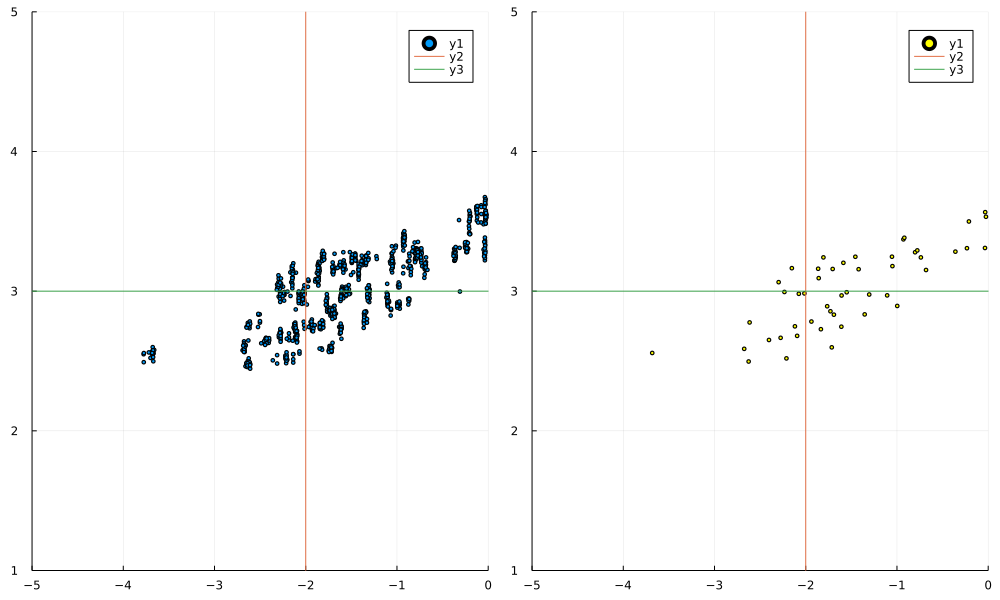

In [40]:
p1 = scatter(est_100[:,1], est_100[:,2], markersize = 2)
vline!([-2])
hline!([3])
p2 = scatter(best_est_100[:,1], best_est_100[:,2], markersize = 2, color=:yellow)
vline!([-2])
hline!([3])
plot(p1, p2, layout= (1,2), size = (1000,600), xlims= (-5,0), ylims=(1,5))

# println("Correlation: ", cor(best_est[:,1], best_est[:,2]))

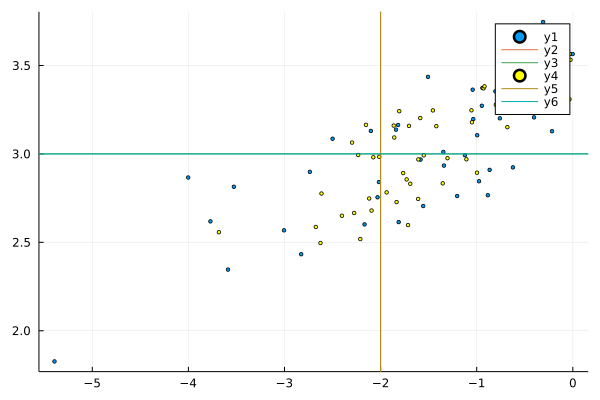

In [41]:
p1 = scatter(best_est_50[:,1], best_est_50[:,2], markersize = 2)
vline!([-2])
hline!([3])
p2 = scatter!(best_est_100[:,1], best_est_100[:,2], markersize = 2, color=:yellow)
vline!([-2])
hline!([3])
# plot(p1, p2, layout= (1,2), size = (1000,600), xlims= (-5,0), ylims=(1,5))

# println("Correlation: ", cor(best_est[:,1], best_est[:,2]))

In [42]:

path_200= "/Users/amir/github/NPSML-Estimator-Price-Data/Price Estimation April 2022/Lognormal-Uniform/MCRES/LNU-04/est_200_sim_50_dmod_3"
res_200 = BSON.load(path_200)
est_200 = reduce(vcat, res_200["beta_hat"])
best_est_200 = zeros((Int(size(est_200)[1]/20)),3)
for i = 1:Int(size(est_100)[1]/20)
    best_est_200[i,:] = est_200[findmin(est_200[20*(i-1)+1: 20*i, 3])[2] + (i-1)*20, :]
end

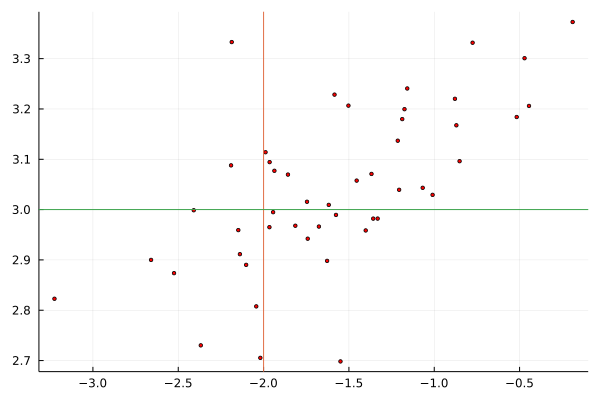

In [43]:
# p1 = scatter(best_est_50[:,1], best_est_50[:,2], markersize = 2)
vline!([-2])
hline!([3])
# p2 = scatter!(best_est_100[:,1], best_est_100[:,2], markersize = 2, color=:yellow)
vline!([-2])
hline!([3])

p3 = scatter(best_est_200[:,1], best_est_200[:,2], markersize = 2, color=:red, legends =false)
vline!([-2])
hline!([3])
# plot(p1, p2, layout= (1,2), size = (1000,600), xlims= (-5,0), ylims=(1,5))

# println("Correlation: ", cor(best_est[:,1], best_est[:,2]))

# NOTS results

Results are divided into two parts. One is Lognormal distribution with different scale parameters, and for different sample sizes. The second one is uniform distribution for unobservable characteristics for different sample sizes. 

We would like to observe how the correlation between the estimated parameters is affected, and I will also consider the how the bias and RMSE are affected.

In [52]:
# Function to process the results from NOTS
true_pars =  [-1.5, 3.5, -.5, -2.5, .5, -2.5, 1.5, 4, -2, 3]
function res_fun(PATH,  verbose=:false)
    out = BSON.load(PATH)
    est= reduce(vcat, out["beta_hat"])
    
    best_est= zeros((Int(size(est)[1]/4)),3)
    for i = 1:Int(size(est)[1]/4)
        best_est[i,:] = est[findmin(est[4*(i-1)+1: 4*i, 3])[2] + (i-1)*4, :]
    end

#     fit = reduce(vcat,out)[:,11]
#     if verbose==true
#         for i = 1:size(est)[1]
#             println("Pars: ", round.(est[i,:], digits=2), " Fitness: ", round.(fit[i], digits=2))
#             sleep(0.1)
#         end
#     end

    bias = mean(best_est[:,1:2], dims=1) -true_pars[9:10]'

    MSE = sqrt.(mean((best_est[:,1:2] .- true_pars[9:10]').^2, dims=1))
#     m_h = mean(bw, dims=1)

    pars = ["b33d", "eqsel", "llike"];

    est_df = DataFrame(best_est, pars);
    
    correlation = cor(best_est[:,1],best_est[:,2])
    return est_df, bias, MSE, correlation
end



res_fun (generic function with 2 methods)

In [120]:
#lognormal distributions

path= "/Users/amir/out/2p-xun/est_50_sim_50_vars_0.1.bson"
est_50_01_ln, bias_50_01_ln, RMSE_50_01_ln, cor_50_01_ln = res_fun(path)

path= "/Users/amir/out/2p-xun/est_50_sim_50_vars_0.5.bson"
est_50_05_ln, bias_50_05_ln, RMSE_50_05_ln, cor_50_05_ln = res_fun(path)

path= "/Users/amir/out/2p-xun/est_50_sim_50_vars_1.0.bson"
est_50_1_ln, bias_50_1_ln, RMSE_50_1_ln, cor_50_1_ln = res_fun(path)


path= "/Users/amir/out/2p-xun/est_100_sim_50_vars_0.1.bson"
est_100_01_ln, bias_100_01_ln, RMSE_100_01_ln, cor_100_01_ln = res_fun(path)

path= "/Users/amir/out/2p-xun/est_100_sim_50_vars_0.5.bson"
est_100_05_ln, bias_100_05_ln, RMSE_100_05_ln, cor_100_05_ln = res_fun(path)

path= "/Users/amir/out/2p-xun/est_100_sim_50_vars_1.0.bson"
est_100_1_ln, bias_100_1_ln, RMSE_100_1_ln, cor_100_1_ln = res_fun(path)


path= "/Users/amir/out/2p-xun/est_200_sim_50_vars_0.1.bson"
est_200_01_ln, bias_200_01_ln, RMSE_200_01_ln, cor_200_01_ln = res_fun(path)

path= "/Users/amir/out/2p-xun/est_200_sim_50_vars_0.5.bson"
est_200_05_ln, bias_200_05_ln, RMSE_200_05_ln, cor_200_05_ln = res_fun(path)

path= "/Users/amir/out/2p-xun/est_200_sim_50_vars_1.0.bson"
est_200_1_ln, bias_200_1_ln, RMSE_200_1_ln, cor_200_1_ln = res_fun(path)




path= "/Users/amir/out/2p-xun-uni/est_50_sim_50-uniform.bson"
est_50_uni, bias_50_uni, RMSE_50_uni, cor_50_uni = res_fun(path)

path= "/Users/amir/out/2p-xun-uni/est_100_sim_50-uniform.bson"
est_100_uni, bias_100_uni, RMSE_100_uni, cor_100_uni = res_fun(path)

path= "/Users/amir/out/2p-xun-uni/est_100_sim_100-uniform.bson"
est_100_2_uni, bias_100_2_uni, RMSE_100_2_uni, cor_100_2_uni = res_fun(path)

path= "/Users/amir/out/2p-xun-uni/est_200_sim_50-uniform.bson"
est_200_uni, bias_200_uni, RMSE_200_uni, cor_200_uni = res_fun(path)



# res_50_01 = BSON.load(path)
# est_50_01 = reduce(vcat, res_50_01["beta_hat"])
# best_est_50_01 = zeros((Int(size(est_50_01)[1]/4)),3)
# for i = 1:Int(size(est_50_01)[1]/4)
#     best_est_50_01[i,:] = est_50_01[findmin(est_50_01[4*(i-1)+1: 4*i, 3])[2] + (i-1)*4, :]
# end

# path= "/Users/amir/out/2p-xun/est_50_sim_50_vars_0.5.bson"
# res_50_05 = BSON.load(path)
# est_50_05 = reduce(vcat, res_50_05["beta_hat"])
# best_est_50_05 = zeros((Int(size(est_50_05)[1]/4)),3)
# for i = 1:Int(size(est_50_05)[1]/4)
#     best_est_50_05[i,:] = est_50_05[findmin(est_50_05[4*(i-1)+1: 4*i, 3])[2] + (i-1)*4, :]
# end

# path= "/Users/amir/out/2p-xun/est_50_sim_50_vars_1.0.bson"
# res_50_1 = BSON.load(path)
# est_50_1 = reduce(vcat, res_50_1["beta_hat"])
# best_est_50_1 = zeros((Int(size(est_50_1)[1]/4)),3)
# for i = 1:Int(size(est_50_1)[1]/4)
#     best_est_50_1[i,:] = est_50_1[findmin(est_50_1[4*(i-1)+1: 4*i, 3])[2] + (i-1)*4, :]
# end



(100×3 DataFrame
 Row │ b33d       eqsel    llike    
     │ Float64    Float64  Float64  
─────┼──────────────────────────────
   1 │ -1.25484   3.02228  0.510373
   2 │ -1.8004    2.83193  0.681554
   3 │ -2.17639   2.8911   0.335945
   4 │ -1.08667   3.1072   0.266933
   5 │ -1.25154   3.13912  0.38573
   6 │ -1.91878   3.03542  0.299898
   7 │ -1.85286   3.02383  0.535883
   8 │ -2.23586   2.80436  0.376281
   9 │ -2.0677    2.90831  0.351774
  10 │ -1.40522   2.93761  0.117928
  11 │ -1.02197   3.03085  0.22169
  ⋮  │     ⋮         ⋮        ⋮
  91 │ -1.26509   3.01326  0.524219
  92 │ -1.92636   2.93766  0.413748
  93 │ -1.58451   3.15518  0.376294
  94 │ -0.807226  3.43434  0.406904
  95 │ -1.21389   3.12244  0.456925
  96 │ -0.686815  3.20152  0.268657
  97 │ -1.86931   3.14975  0.633268
  98 │ -2.28626   2.9036   0.276084
  99 │ -1.67233   3.05776  0.396577
 100 │ -1.72664   3.04383  0.373144
                     79 rows omitted, [0.48731703444225927 0.06369669576238479], [0.76

In [138]:
round.(RMSE_100_01_ln,digits = 3)
# round.(bias_100_uni,digits = 3)
# round.(RMSE_50_uni,digits = 3)


1×2 Matrix{Float64}:
 1.299  1.316

In [131]:
round.(RMSE_100_2_uni,digits = 3)
# round.(bias_100_2_uni,digits = 3)


1×2 Matrix{Float64}:
 0.925  0.227

In [111]:
round(cor_200_uni,digits = 3)

0.767

In [100]:
println("bias: ", bias_50_uni)
println("bias: ", bias_100_uni)
println("bias: ", bias_200_uni)


bias: [0.29330541896343876 -0.025214183971845827]
bias: [0.49090846671684174 0.013956354590033637]
bias: [0.48731703444225927 0.06369669576238479]


In [70]:
println("RMSE: ", RMSE_50_uni)
println("RMSE: ", RMSE_100_uni)
println("RMSE: ", RMSE_200_uni)


RMSE: [1.292280126239607 0.33574207301060854]
RMSE: [1.0147510361512597 0.2432398368862285]
RMSE: [0.7637540258838168 0.1766727387444518]


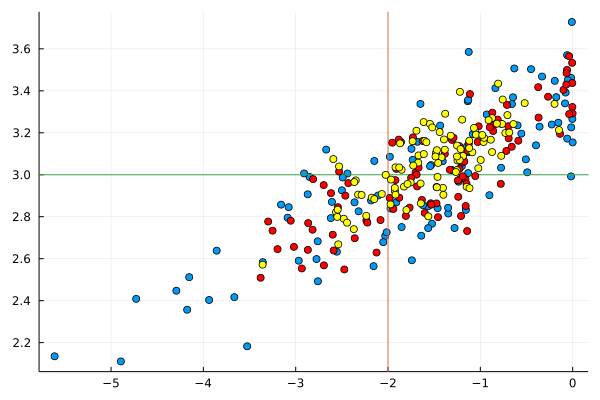

In [79]:
scatter(est_50_uni[:,1],est_50_uni[:,2], legends=false)
vline!([-2.])
hline!([3.])

scatter!(est_100_uni[:,1],est_100_uni[:,2], color = :red)
scatter!(est_200_uni[:,1],est_200_uni[:,2], color = :yellow)


In [63]:
println("bias: ", bias_50_01_ln)
println("bias: ", bias_50_05_ln)
println("bias: ", bias_50_1_ln)

println("bias: ", bias_100_01_ln)
println("bias: ", bias_100_05_ln)
println("bias: ", bias_100_1_ln)


println("bias: ", bias_200_01_ln)
println("bias: ", bias_200_05_ln)
println("bias: ", bias_200_1_ln)


bias: [-0.37654159611426374 -0.4361133066345739]
bias: [0.9784512255472819 0.9813462094674565]
bias: [1.322549315422038 1.3574931931304954]
bias: [-1.0557350731819377 -1.0710207324985093]
bias: [0.6339336410973824 0.643379978886768]
bias: [1.1423130695156547 1.16587022062585]
bias: [-2.037390769543209 -2.0368431067556374]
bias: [0.03888446013490299 0.013121205090890431]
bias: [0.6777933618843182 0.7326908306305557]


In [62]:
println("RMSE: ", RMSE_50_01_ln)
println("RMSE: ", RMSE_50_05_ln)
println("RMSE: ", RMSE_50_1_ln)

println("RMSE: ", RMSE_100_01_ln)
println("RMSE: ", RMSE_100_05_ln)
println("RMSE: ", RMSE_100_1_ln)


println("RMSE: ", RMSE_200_01_ln)
println("RMSE: ", RMSE_200_05_ln)
println("RMSE: ", RMSE_200_1_ln)

RMSE: [1.1258713715930189 1.1526718948256092]
RMSE: [1.0947489380639346 1.107919222615545]
RMSE: [1.428521390063063 1.449943971201222]
RMSE: [1.2986784370347242 1.3164859590925464]
RMSE: [0.7746129528422431 0.7953401525855157]
RMSE: [1.21235259638296 1.2330959064233415]
RMSE: [2.1417663543943237 2.1393140652671256]
RMSE: [0.36403665672575414 0.3679945273625164]
RMSE: [0.7863290892656636 0.8114965727874635]


In [58]:
println("Correlation: ", cor(est_50_01_ln[:,1],est_50_01_ln[:,2]))
println("Correlation: ", cor(est_50_05_ln[:,1],est_50_05_ln[:,2]))
println("Correlation: ", cor(est_50_1_ln[:,1],est_50_1_ln[:,2]))


Correlation: 0.9941305544091467
Correlation: 0.9511241505132525
Correlation: 0.9119757363183044


In [46]:
best_est_50_01

100×3 Matrix{Float64}:
 -3.76221    1.34958  1.17251
 -2.3888     2.56729  0.446087
 -0.98257    3.91313  0.738915
 -1.83861    3.15993  0.803159
 -0.6072     4.45146  0.963736
 -2.4154     2.42444  1.50152
 -3.64691    1.48662  1.42145
 -0.0533898  4.89753  1.13457
 -2.96636    2.07237  1.61723
 -3.22294    1.67088  1.65643
 -2.93234    1.99439  1.10972
 -3.22724    1.59134  1.48592
 -2.33466    2.63839  0.647365
  ⋮                   
 -3.00018    1.9568   1.15232
 -1.00626    3.83864  1.30293
 -1.34012    3.61253  0.598182
 -2.31981    2.6015   0.318659
 -2.33523    2.55514  1.33854
 -2.37331    2.71157  1.22997
 -2.32388    2.5199   0.685638
 -1.65684    3.29386  0.91153
 -1.85312    2.96667  0.989681
 -2.46743    2.44509  1.11304
 -2.30274    2.70753  0.502967
 -1.42446    3.482    0.396767